# Baseline CNN-LSTM + TF-IDF Unigram

## Import Library

In [17]:
# importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Dense, Dropout, Conv1D, LSTM, MaxPool1D, Flatten
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

## Import Dataset

In [18]:
df = pd.read_csv('tweet_after_preprocessing_29k.csv', usecols = ['detokenize', 'label_1'])
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [19]:
df = df.dropna()
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [20]:
x = df['detokenize'].copy()
y = df['label_1'].copy()

## Feature Extraction (TF-IDF)

In [21]:
%%time
# define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(1,1), max_features=1000)

# create dataframe using tf-idf
x_uni = pd.DataFrame(tf_idf_vec.fit_transform(x).toarray(), columns=tf_idf_vec.get_feature_names_out())
y_uni = y

x_uni

CPU times: user 357 ms, sys: 366 ms, total: 723 ms
Wall time: 723 ms


,abang,acara,ada,adab,adik,adil,admin,adu,aduh,agama,...,wasit,way,weeaboo,wifi,wkwk,woi,ya,yaman,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.515955,0.0,0.0,0.0
29062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.544035,0.0,0.0,0.0
29063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Splitting Data 70:30

In [22]:
# splitting Data to 70:30
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_uni, y_uni, test_size = 0.3, random_state=0)

# reshape the train and test data
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

## Modelling

In [23]:
%%time
# define the CNN_LSTM model
cnn_lstm_model = tf.keras.models.Sequential() # create sequential model 
cnn_lstm_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (1, X_train.shape[2]))) # first cnn layer with 32 filters, conv window 3 and Leaky relu activation 
cnn_lstm_model.add(MaxPool1D(pool_size=3, padding='same')) # second cnn layer using max pooling with pool size 2
cnn_lstm_model.add(LSTM(64, activation=tf.keras.layers.LeakyReLU(alpha=0.001), return_sequences=True)) # first lstm layer with 32 filters, leaky relu activation and return sequence set to true
cnn_lstm_model.add(Dropout(0.2)) # add dropout layer 0.2
cnn_lstm_model.add(Flatten()) # flatten the output
cnn_lstm_model.add(Dense(units = 1, activation='sigmoid')) # dense as last layer with units=1 and activation sigmoid

# compile the model
cnn_lstm_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
cnn_lstm_model.summary()

# plot model architecture
plot_model(cnn_lstm_model, to_file='cnn_lstm_model.png', show_shapes=True, show_layer_names=True)

# fit the model on the training data
cnn_lstm_model_history = cnn_lstm_model.fit(X_train, y_train, epochs=5, batch_size = 64, validation_data = (X_test, y_test))

# evaluate the model and predict
score = cnn_lstm_model.evaluate(X_test, y_test, batch_size=64, verbose=0)

print()
print('Validation Accuracy:', score[1])
print('Validation Loss:', score[0])
print()

y_pred = cnn_lstm_model.predict(X_test)
y_true = y_test

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 32)             96032     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 1, 64)             24832     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                      

In [24]:
# show the classification report from the model
classreport = classification_report(y_true, y_pred.round(), digits=4)
accscore = accuracy_score(y_true, y_pred.round())
precscore = precision_score(y_true, y_pred.round())
recscore = recall_score(y_true, y_pred.round())
f1score = f1_score(y_true, y_pred.round(), average='weighted')

print('Classification Report :')
print(classreport)

Classification Report :
              precision    recall  f1-score   support

           0     0.8077    0.7726    0.7897      4424
           1     0.7758    0.8105    0.7928      4296

    accuracy                         0.7913      8720
   macro avg     0.7918    0.7916    0.7913      8720
weighted avg     0.7920    0.7913    0.7913      8720



In [25]:
# show the accuracy, f1-Score, precision and recall score
print('Accuracy Score  :', accscore)
print('Precision Score :', precscore)
print('Recall Score    :', recscore)
print('F1 Score        :', f1score)

Accuracy Score  : 0.7912844036697247
Precision Score : 0.7758467023172906
Recall Score    : 0.8105214152700186
F1 Score        : 0.7912506728783216


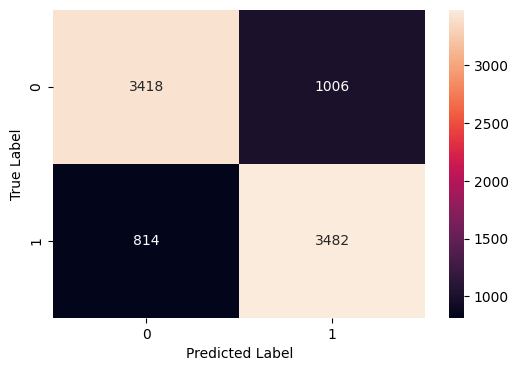

In [26]:
# show the confusion matrix 
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_true, y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()